In [ ]:
import os

MODEL_NAME = 'SSD_MobileNet_V2_FPNLite_320x320'
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TFRECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [ ]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',MODEL_NAME, 'export'), 
#     'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
#     'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
}

In [ ]:
files_paths = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TFRECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [ ]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [ ]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Cloning into 'Tensorflow/models'...
remote: Enumerating objects: 58192, done.
remote: Counting objects: 100% (524/524), done.
remote: Compressing objects: 100% (238/238), done.
remote: Total 58192 (delta 294), reused 497 (delta 281), pack-reused 57668
Receiving objects: 100% (58192/58192), 573.08 MiB | 36.77 MiB/s, done.
Resolving deltas: 100% (40276/40276), done.


In [ ]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e .

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Processing /content/Tensorflow/models/research
     |████████████████████████████████| 9.6MB 6.9MB/s 
     |████████████████████████████████| 358kB 51.0MB/s 
     |████████████████████████████████| 1.6MB 53.5MB/s 
     |████████████████████████████████| 829kB 49.2MB/s 
     |████████████████████████████████| 153kB 54.3MB/s 
     |████████████████████████████████| 2.3MB 44.6MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
     |████████████████████████████████| 174kB 57.1MB/s 
     |████████████████████████████████| 1.2MB 43.8MB/s 
     |████████████████████████████████| 61kB 10.0MB/s 
     |████████████████████████████████| 51kB 9.5MB/s 
     |████████████████████████████████| 102kB 14.2MB/s 
     |████████████████████████████████| 645kB 39.9MB/s 
   

In [ ]:
# from google.colab import files
# files.upload() #upload kaggle.json

# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !ls ~/.kaggle
# !chmod 600 /root/.kaggle/kaggle.json
# !kaggle datasets download -d karthika95/pedestrian-detection
# !unzip /content/pedestrian-detection.zip -d {paths['IMAGE_PATH']}

In [ ]:
# Create labelmap

labels = [
          {'name':'person', 'id':1},
          {'name':'person-like', 'id':2}
]

with open(files_paths['LABELMAP'], 'w+') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# Load trained model from checkpoint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !rm -r {paths['CHECKPOINT_PATH']}
!tar -zxvf /content/drive/MyDrive/people-detection-model.tar.gz -C /content

Tensorflow/workspace/models/SSD_MobileNet_V2_FPNLite_320x320/
Tensorflow/workspace/models/SSD_MobileNet_V2_FPNLite_320x320/ckpt-15.data-00000-of-00001
Tensorflow/workspace/models/SSD_MobileNet_V2_FPNLite_320x320/ckpt-20.data-00000-of-00001
Tensorflow/workspace/models/SSD_MobileNet_V2_FPNLite_320x320/ckpt-16.data-00000-of-00001
Tensorflow/workspace/models/SSD_MobileNet_V2_FPNLite_320x320/eval/
Tensorflow/workspace/models/SSD_MobileNet_V2_FPNLite_320x320/eval/events.out.tfevents.1623261420.f82a39d09be9.1432.1381.v2
Tensorflow/workspace/models/SSD_MobileNet_V2_FPNLite_320x320/train/
Tensorflow/workspace/models/SSD_MobileNet_V2_FPNLite_320x320/train/events.out.tfevents.1623257262.f82a39d09be9.632.1550.v2
Tensorflow/workspace/models/SSD_MobileNet_V2_FPNLite_320x320/ckpt-17.index
Tensorflow/workspace/models/SSD_MobileNet_V2_FPNLite_320x320/export/
Tensorflow/workspace/models/SSD_MobileNet_V2_FPNLite_320x320/export/checkpoint/
Tensorflow/workspace/models/SSD_MobileNet_V2_FPNLite_320x320/expor

In [ ]:
# Upload checkpoint folder to local runtime previously
import tensorflow as tf
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import label_map_util, config_util
from object_detection.builders import model_builder

# Load pipeline config and build detection model
configs = config_util.get_configs_from_pipeline_file(files_paths['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoints
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'],'ckpt-21')).expect_partial()

In [50]:
img_url = 'https://untappedcities.com/wp-content/uploads/2020/03/Park-Avenue-Pedestrian-Car-Free-Street-Coronavirus-Ryan-Lahiff-NYC-009.jpg'
!wget {img_url}

--2021-06-10 17:37:23--  https://untappedcities.com/wp-content/uploads/2020/03/Park-Avenue-Pedestrian-Car-Free-Street-Coronavirus-Ryan-Lahiff-NYC-009.jpg
Resolving untappedcities.com (untappedcities.com)... 104.21.66.174, 172.67.162.115
Connecting to untappedcities.com (untappedcities.com)|104.21.66.174|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 144571 (141K) [image/jpeg]
Saving to: ‘Park-Avenue-Pedestrian-Car-Free-Street-Coronavirus-Ryan-Lahiff-NYC-009.jpg’

Park-Avenue-Pedestr 100%[===================>] 141.18K  --.-KB/s    in 0.06s   

2021-06-10 17:37:23 (2.13 MB/s) - ‘Park-Avenue-Pedestrian-Car-Free-Street-Coronavirus-Ryan-Lahiff-NYC-009.jpg’ saved [144571/144571]



In [54]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

@tf.function
def detect_image(image):
  image, shapes = detection_model.preprocess(image)
  detections = detection_model.predict(image, shapes)
  detections_dict = detection_model.postprocess(detections,shapes)
  return detections_dict

category_index = label_map_util.create_category_index_from_labelmap(files_paths['LABELMAP'])
TEST_IMAGE_PATH = '/content/Park-Avenue-Pedestrian-Car-Free-Street-Coronavirus-Ryan-Lahiff-NYC-009.jpg'

In [55]:
img = np.array(cv.imread(TEST_IMAGE_PATH))
input_tensor = tf.convert_to_tensor(np.expand_dims(img, 0), dtype=tf.float32)
# print(input_tensor)

result = detect_image(input_tensor)
num_detections = int(result.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy() for key, value in result.items()}
detections['num_detections'] = num_detections
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

print(detections)

{'detection_boxes': array([[2.90615797e-01, 3.62727046e-01, 9.73863363e-01, 5.71321964e-01],
       [2.78167099e-01, 6.24189496e-01, 9.49649215e-01, 8.14828277e-01],
       [2.77164012e-01, 3.66534859e-01, 9.83606219e-01, 5.55301368e-01],
       [4.48599428e-01, 8.55223835e-01, 6.53074920e-01, 9.20668542e-01],
       [3.97328556e-01, 1.52930856e-01, 8.50737512e-01, 2.62864947e-01],
       [2.79438287e-01, 6.30352616e-01, 9.73768950e-01, 7.93723106e-01],
       [1.49433672e-01, 0.00000000e+00, 6.48818552e-01, 1.41611487e-01],
       [4.00264382e-01, 1.64068520e-01, 6.97133422e-01, 2.63275117e-01],
       [4.40459341e-01, 8.54056895e-01, 6.53354228e-01, 9.13848817e-01],
       [4.00264382e-01, 1.64068520e-01, 6.97133422e-01, 2.63275117e-01],
       [4.35819745e-01, 8.46272349e-01, 6.40342712e-01, 8.96519303e-01],
       [4.35819745e-01, 8.46272349e-01, 6.40342712e-01, 8.96519303e-01],
       [2.06077620e-01, 8.24773252e-01, 6.30014718e-01, 9.14017975e-01],
       [3.96514893e-01, 1.55650

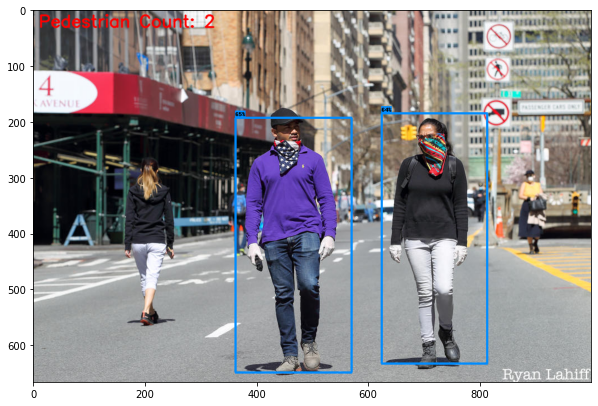

In [57]:
import cv2

img_with_detections = img.copy()
label_offset=1
font = cv2.FONT_HERSHEY_SIMPLEX
org = (10, 30)
color = (0, 0, 255)
thickness = 2
fontScale = 1
min_thresh = 0.5
count = len(detections['detection_scores'][detections['detection_scores']>min_thresh])
count_text = f'Pedestrian Count: {count}'

img_with_detections = cv2.putText(img_with_detections, count_text, org, font, 
                   fontScale, color, thickness, cv2.LINE_AA)

viz_utils.visualize_boxes_and_labels_on_image_array(
    img_with_detections,
    detections['detection_boxes'],
    detections['detection_classes']+label_offset,
    detections['detection_scores'],
    category_index,
    use_normalized_coordinates=True,
    max_boxes_to_draw=8,
    agnostic_mode=True,
    min_score_thresh = min_thresh
)

plt.figure(figsize=(10,8))
plt.imshow(cv.cvtColor(img_with_detections,cv.COLOR_BGR2RGB))